1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


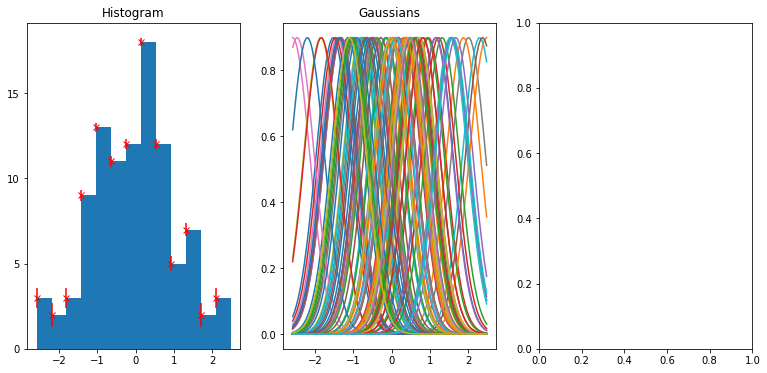

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.integrate import trapz

N = 100
bins = 13

x = np.array(np.random.randn(N))
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(13, 6)

ax[0].set_title("Histogram")
bins = ax[0].hist(x, bins)
ax[0].locator_params(axis="y",integer = True)

p = 1 / np.sqrt(bins[0])
err = (bins[1][:-1] + bins[1][:-1]) / 2
ax[0].errorbar(err, bins[0], yerr=p, fmt="x", color='red')

ax[1].set_title("Gaussians")
std = 1.06*x.std()* (x.size ** (- 1/5))
x_grids = np.linspace(np.min(x), np.max(x), N)
gaussians = []
for a in x:
    gaussian = norm.pdf(x_grids, a, scale=std)
    gaussians.append(gaussian)
    ax[1].plot(x_grids, gaussian)
    




2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

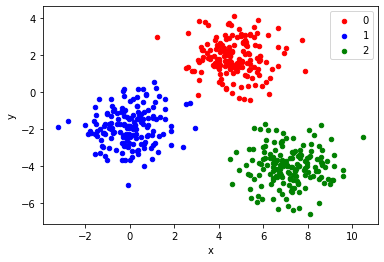

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.datasets import make_blobs

N = 500
X, y = make_blobs(N, centers=3, n_features=2)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

--2020-11-25 20:08:55--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2020-11-25 20:08:56--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4bcb7b261b8e84da93c1f1d59e.dl.dropboxusercontent.com/cd/0/inline/BD5K9TQLr9LnYaO1crtAONbtdSalXrlbEtODeRY6xDxSkQwdYze1FuzZsWGfRnCtgoaBe6NwUHPIJGYBsjaKiwdNJcr6o7HF-zaNroa-ogS51A/file# [following]
--2020-11-25 20:08:56--  https://uc4bcb7b261b8e84da93c1f1d59e.dl.dropboxusercontent.com/cd/0/inline/BD5K9TQLr9LnYaO1crtAONbtdSalXrlbEtODeRY6xDxSkQwdYze1FuzZsWGfRnCtgoaBe6NwUHPIJGYBsjaKiwdNJcr6o7HF-zaNroa

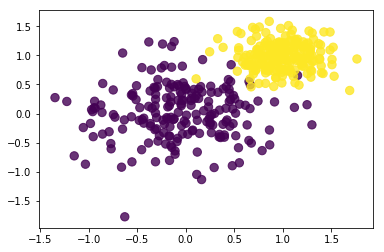

In [65]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = np.load('residuals_261.npy', allow_pickle=True)

In [23]:
df = pd.DataFrame(data.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [24]:
df['residuals'] = df['residuals'].abs()
df

,residuals,distances
0,1.100000,16.0
1,1.950000,6.3
2,7.200000,3.4
3,4.150000,8.4
4,6.590000,1.7
...,...,...
11126,0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [25]:
df = df[abs(df["residuals"]) <= 2]
df

,residuals,distances
0,1.100000,16.0
1,1.950000,6.3
8,0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


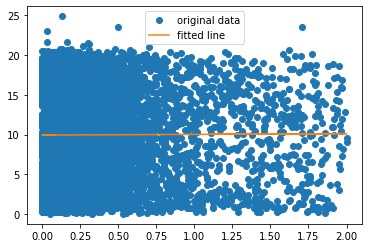

In [36]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["residuals"], df["distances"])
predict_y = slope * df["residuals"] + intercept

plt.plot(df['residuals'], df['distances'], 'o', label='original data')
plt.plot(df['residuals'], predict_y, label='fitted line')
plt.legend()
plt.show()

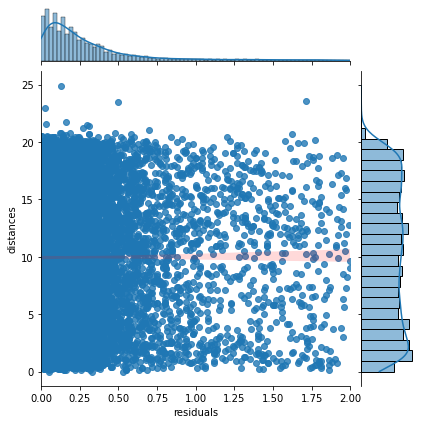

In [27]:
sns.jointplot(data=df, x="residuals", y="distances", kind="reg", line_kws={"color": "r"})

In [63]:
bins = 13
x1 = np.linspace(0, 20, bins)
x = (x1[1:] + x1[:-1])/2
res = np.digitize(df["distances"], x)
y = [df["residuals"][res == i].mean() for i in range(1, len(x1))]
erry = [df["residuals"][res == i].std() for i in range(1, len(x1))]                                         

<ErrorbarContainer object of 3 artists>

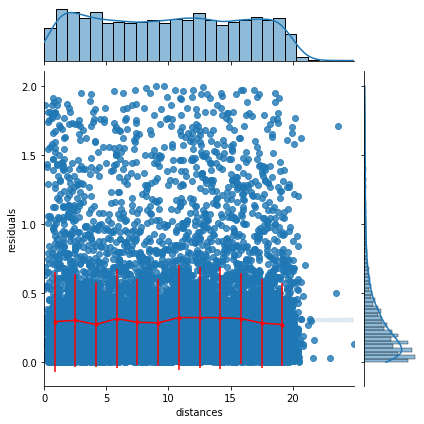

In [64]:
sns.jointplot(x="distances", y="residuals", data=df, kind="reg")
plt.errorbar(x=x, y=y , yerr=erry, marker = '.', color = 'r')